In [111]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt

%matplotlib inline

In [112]:
test = pd.read_csv("../assets/test.csv")
train = pd.read_csv("../assets/train.csv")
spray = pd.read_csv("../assets/spray.csv")
weather = pd.read_csv("../assets/weather.csv")

In [113]:
train["spray"] = 0
spray["spray"] = 1

In [140]:
trainAndSpray = pd.DataFrame()
trainAndSpray = trainAndSpray.append(train)
trainAndSpray = trainAndSpray.append(spray)


In [115]:
trainAndSpray["Date"] = pd.to_datetime(trainAndSpray["Date"])
trainAndSpray = trainAndSpray.set_index('Date')
trainAndSpray

,Address,AddressAccuracy,AddressNumberAndStreet,Block,Latitude,Longitude,NumMosquitos,Species,Street,Time,Trap,WnvPresent,spray
Date,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9.0,"4100 N OAK PARK AVE, Chicago, IL",41.0,41.954690,-87.800991,1.0,CULEX PIPIENS/RESTUANS,N OAK PARK AVE,NaN,T002,0.0,0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9.0,"4100 N OAK PARK AVE, Chicago, IL",41.0,41.954690,-87.800991,1.0,CULEX RESTUANS,N OAK PARK AVE,NaN,T002,0.0,0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",9.0,"6200 N MANDELL AVE, Chicago, IL",62.0,41.994991,-87.769279,1.0,CULEX RESTUANS,N MANDELL AVE,NaN,T007,0.0,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",8.0,"7900 W FOSTER AVE, Chicago, IL",79.0,41.974089,-87.824812,1.0,CULEX PIPIENS/RESTUANS,W FOSTER AVE,NaN,T015,0.0,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",8.0,"7900 W FOSTER AVE, Chicago, IL",79.0,41.974089,-87.824812,4.0,CULEX RESTUANS,W FOSTER AVE,NaN,T015,0.0,0
2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",8.0,"1500 W WEBSTER AVE, Chicago, IL",15.0,41.921600,-87.666455,2.0,CULEX RESTUANS,W WEBSTER AVE,NaN,T045,0.0,0
2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",8.0,"2500 W GRAND AVE, Chicago, IL",25.0,41.891118,-87.654491,1.0,CULEX RESTUANS,W GRAND AVE,NaN,T046,0.0,0
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",8.0,"1100 W ROOSEVELT, Chicago, IL",11.0,41.867108,-87.654224,1.0,CULEX PIPIENS/RESTUANS,W ROOSEVELT,NaN,T048,0.0,0
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",8.0,"1100 W ROOSEVELT, Chicago, IL",11.0,41.867108,-87.654224,2.0,CULEX RESTUANS,W ROOSEVELT,NaN,T048,0.0,0


In [116]:
weather["Date"] = pd.to_datetime(weather["Date"])
weather = weather.set_index('Date')


In [117]:
trainWeatherSpray = trainAndSpray.join(weather)

In [118]:
trainWeatherSpray.to_csv("../assets/trainWeatherSpray.csv")

In [142]:
data = pd.read_csv("../assets/trainWeatherSpray.csv")

In [146]:
data.columns

Index([u'Date', u'Address', u'AddressAccuracy', u'AddressNumberAndStreet',
       u'Block', u'Latitude', u'Longitude', u'NumMosquitos', u'Species',
       u'Street', u'Time', u'Trap', u'WnvPresent', u'spray', u'Station',
       u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint', u'WetBulb', u'Heat',
       u'Cool', u'Sunrise', u'Sunset', u'CodeSum', u'Depth', u'Water1',
       u'SnowFall', u'PrecipTotal', u'StnPressure', u'SeaLevel',
       u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [147]:
data = data[["Block","Latitude","Longitude","NumMosquitos","spray","Tmax","Tmin","Tavg","DewPoint","Heat","Cool","PrecipTotal","StnPressure","SeaLevel","ResultSpeed","ResultDir","AvgSpeed"]]
data.replace('M', np.NaN, inplace=True)
data.replace('T', np.NaN, inplace=True)
data.replace('  T', np.NaN, inplace=True)
data.replace('nan', np.NaN, inplace=True)
data.dropna(inplace=True)
data.PrecipTotal.unique()

array(['0.00', '0.42', '0.27', '0.16', '1.55', '0.92', '0.01', '0.17',
       '0.04', '1.31', '0.06', '0.09', '0.05', '0.46', '0.23', '0.83',
       '0.37', '0.88', '0.24', '0.20', '0.18', '0.08', '0.12', '3.97',
       '0.87', '0.14', '0.19', '0.02', '0.03', '0.33', '0.95', '1.19',
       '0.89', '0.59', '0.52', '0.44', '0.39', '0.13', '0.70', '0.36',
       '0.79', '0.11', '0.50', '0.84', '0.58'], dtype=object)

In [148]:
ss = StandardScaler()
pca = PCA()

pipe = Pipeline([('ss', ss),('pca', pca)])

columns = data.columns
tmp = np.array(data)
dataOriginal = pipe.fit_transform(tmp)
dataOriginal = pd.DataFrame(dataOriginal,columns=columns)
dataOriginal.head()

/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Block,Latitude,Longitude,NumMosquitos,spray,Tmax,Tmin,Tavg,DewPoint,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,-0.560501,0.881352,1.599427,1.009710,-0.507969,-0.471744,0.635566,-0.195725,-0.042009,0.192830,0.577093,-0.422895,0.006739,0.086231,-0.037392,-3.787342e-15,3.478662e-17
1,0.063315,1.035613,1.572723,1.219740,-0.441819,-0.934617,0.759256,-0.127382,0.394161,0.194850,0.264156,0.032600,0.195119,-0.118848,0.029802,4.671665e-15,7.912757e-17
2,-0.560501,0.881352,1.599427,1.009710,-0.507969,-0.471744,0.635566,-0.195725,-0.042009,0.192830,0.577093,-0.422895,0.006739,0.086231,-0.037392,-2.454500e-14,-1.256528e-16
3,0.063315,1.035613,1.572723,1.219740,-0.441819,-0.934617,0.759256,-0.127382,0.394161,0.194850,0.264156,0.032600,0.195119,-0.118848,0.029802,-4.481479e-16,1.136975e-17
4,-0.565560,0.856710,1.816472,0.833662,-1.050884,-0.811952,0.155103,-0.193470,-0.044033,-0.315021,0.633235,-0.406281,0.005124,0.087471,-0.038690,3.384875e-15,-6.233727e-15


In [149]:
sumExplainedVariance = sum(pca.explained_variance_)
varianceExplained = [(i / sumExplainedVariance)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cumulativeVarianceexplained = np.cumsum(varianceExplained)

In [150]:
varianceExplained

[35.2859363412853,
 16.366739177475093,
 10.892806051296668,
 7.2828296352183992,
 6.9615849909895351,
 6.0275701597444158,
 5.0842815516001911,
 4.1008678229119848,
 3.1340306723431475,
 1.7388416271197658,
 1.6621415506452395,
 0.68458159750757874,
 0.52566305341561381,
 0.24532797532332279,
 0.006797793123737233,
 1.5169543402670462e-30,
 1.2900607709302043e-32]

In [151]:
cumulativeVarianceexplained

array([ 35.28593634,  51.65267552,  62.54548157,  69.82831121,
        76.7898962 ,  82.81746636,  87.90174791,  92.00261573,
        95.1366464 ,  96.87548803,  98.53762958,  99.22221118,
        99.74787423,  99.99320221, 100.        , 100.        , 100.        ])

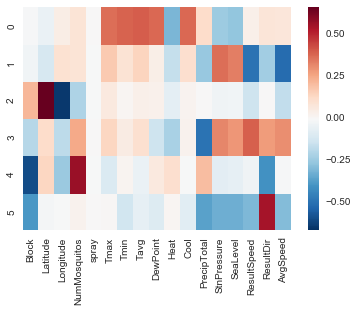

In [152]:
pcaData = pd.DataFrame(pca.components_,columns=columns)
sns.heatmap(pcaData.iloc[0:6,:])

In [153]:
del data["Latitude"]
del data["Longitude"]
del data["spray"]

In [154]:
ss = StandardScaler()
pca = PCA()

pipe = Pipeline([('ss', ss),('pca', pca)])

columns = data.columns
tmp = np.array(data)
dataOriginal = pipe.fit_transform(tmp)
dataOriginal = pd.DataFrame(dataOriginal,columns=columns)
dataOriginal.head()

/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Block,NumMosquitos,Tmax,Tmin,Tavg,DewPoint,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,-0.463818,1.114031,0.076428,-1.153434,-0.463835,0.654830,-0.135312,-0.098345,0.619286,0.424246,0.013558,0.084650,0.037033,-3.547505e-15
1,0.159974,1.272178,0.303570,-1.201822,-0.924419,0.778476,-0.066999,0.337176,0.310517,-0.031472,-0.171831,-0.121105,-0.030237,-3.452834e-15
2,-0.463818,1.114031,0.076428,-1.153434,-0.463835,0.654830,-0.135312,-0.098345,0.619286,0.424246,0.013558,0.084650,0.037033,3.300274e-14
3,0.159974,1.272178,0.303570,-1.201822,-0.924419,0.778476,-0.066999,0.337176,0.310517,-0.031472,-0.171831,-0.121105,-0.030237,-5.408545e-15
4,-0.467590,1.107808,-0.377743,-1.518220,-0.806698,0.116999,-0.154932,-0.101256,0.618260,0.427528,0.008636,0.082921,0.037787,-3.966002e-15


In [155]:
sumExplainedVariance = sum(pca.explained_variance_)
varianceExplained = [(i / sumExplainedVariance)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cumulativeVarianceexplained = np.cumsum(varianceExplained)

In [156]:
varianceExplained

[40.193340118898277,
 18.55594404193323,
 8.6493737090861362,
 8.1231183507115716,
 6.8878832192024175,
 5.7223401073584617,
 4.6942651035591503,
 3.5940215866870231,
 1.9036227927769507,
 0.78455242438230399,
 0.60328214450028206,
 0.28048322818025861,
 0.0077731727239364681,
 5.8816371979076382e-31]

In [157]:
cumulativeVarianceexplained

array([  40.19334012,   58.74928416,   67.39865787,   75.52177622,
         82.40965944,   88.13199955,   92.82626465,   96.42028624,
         98.32390903,   99.10846145,   99.7117436 ,   99.99222683,
        100.        ,  100.        ])

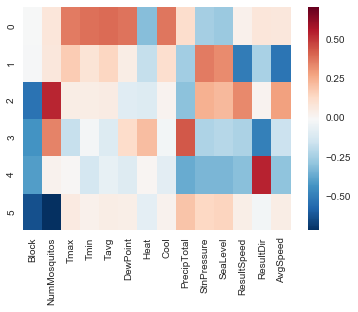

In [158]:
pcaData = pd.DataFrame(pca.components_,columns=columns)
sns.heatmap(pcaData.iloc[0:6,:])

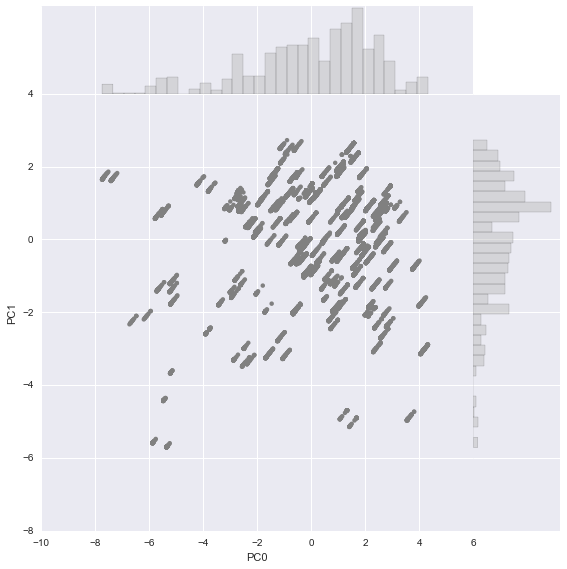

In [159]:
g = sns.JointGrid(dataOriginal.iloc[:,0], dataOriginal.iloc[:,1], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')

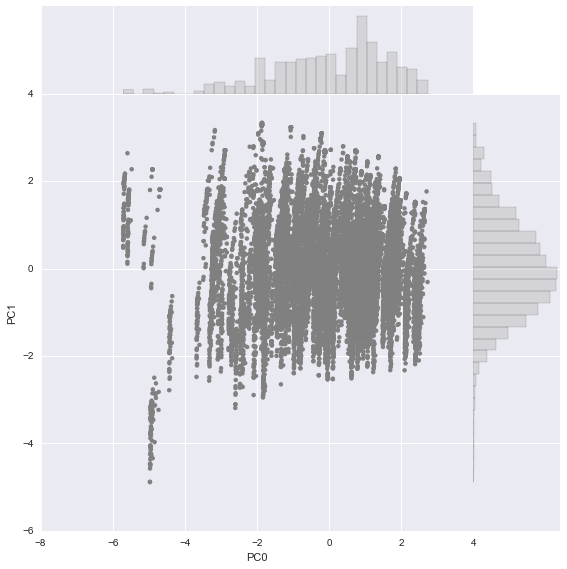

In [160]:
g = sns.JointGrid(dataOriginal.iloc[:,1], dataOriginal.iloc[:,2], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')

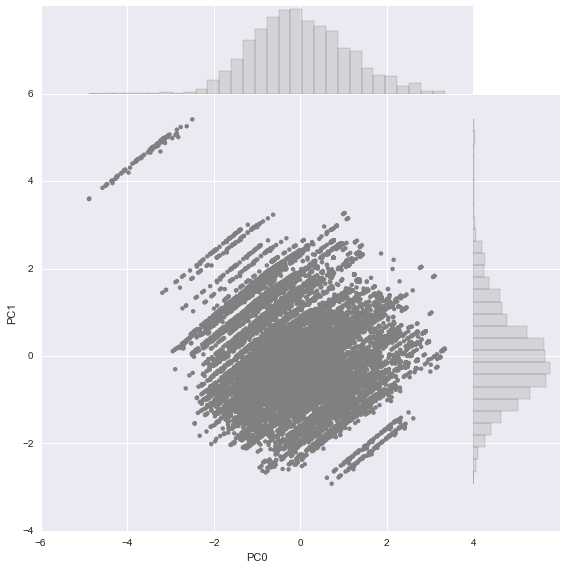

In [161]:
g = sns.JointGrid(dataOriginal.iloc[:,2], dataOriginal.iloc[:,3], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')

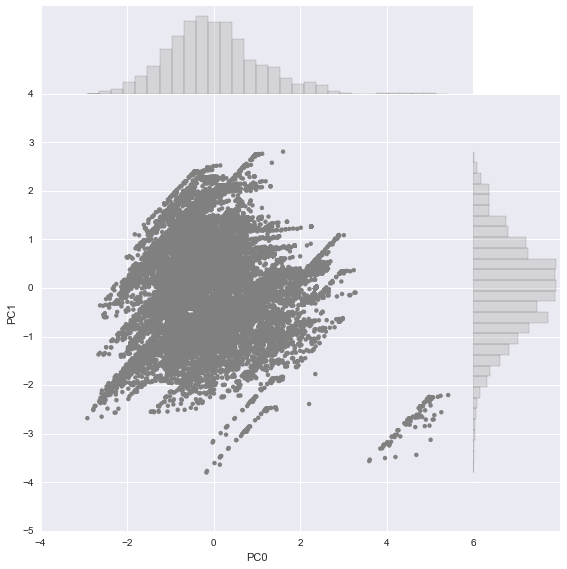

In [162]:
g = sns.JointGrid(dataOriginal.iloc[:,3], dataOriginal.iloc[:,4], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')

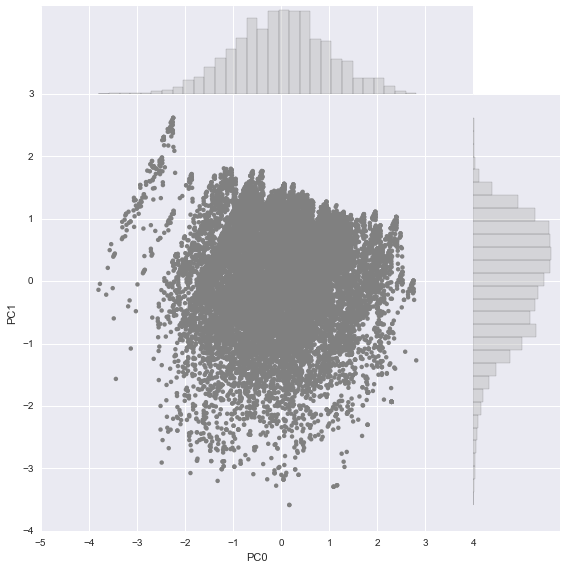

In [163]:
g = sns.JointGrid(dataOriginal.iloc[:,4], dataOriginal.iloc[:,5], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')